# Imports

In [239]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [240]:
df = pd.read_csv("./data/HW3_movie_metadata.csv")
df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [241]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Exploratory Data Analysis

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [243]:
df.describe(include="all")

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


array([[<AxesSubplot:title={'center':'num_critic_for_reviews'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'director_facebook_likes'}>,
        <AxesSubplot:title={'center':'actor_3_facebook_likes'}>],
       [<AxesSubplot:title={'center':'actor_1_facebook_likes'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'num_voted_users'}>,
        <AxesSubplot:title={'center':'cast_total_facebook_likes'}>],
       [<AxesSubplot:title={'center':'facenumber_in_poster'}>,
        <AxesSubplot:title={'center':'num_user_for_reviews'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'title_year'}>],
       [<AxesSubplot:title={'center':'actor_2_facebook_likes'}>,
        <AxesSubplot:title={'center':'imdb_score'}>,
        <AxesSubplot:title={'center':'aspect_ratio'}>,
        <AxesSubplot:title={'center':'movie_facebook_likes'}>]],
      dtype=object)

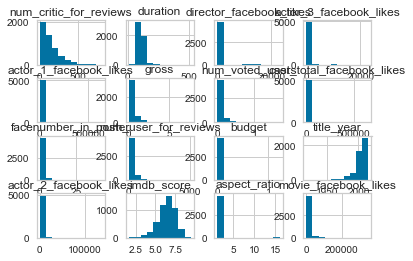

In [244]:
df.hist()

# Preprocess

In [245]:
df = df.select_dtypes(exclude=["object"])
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
dtype: object

In [246]:
med = df.median()
df = df.fillna(med)
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,110.0,103.0,131.0,371.5,131.0,25517500.0,8,143,0.0,156.0,20000000.0,2005.0,12.0,7.1,2.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,25517500.0,629,2283,2.0,6.0,20000000.0,2013.0,470.0,7.7,2.35,84
5039,43.0,43.0,49.0,319.0,841.0,25517500.0,73839,1753,1.0,359.0,20000000.0,2005.0,593.0,7.5,16.00,32000
5040,13.0,76.0,0.0,0.0,0.0,25517500.0,38,0,0.0,3.0,1400.0,2013.0,0.0,6.3,2.35,16
5041,14.0,100.0,0.0,489.0,946.0,10443.0,1255,2386,5.0,9.0,20000000.0,2012.0,719.0,6.3,2.35,660


In [247]:
df.isna().sum()

num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [248]:
X = df.drop('imdb_score', axis = 1)
y = round(df['imdb_score'])

## No split

In [249]:
scaler = MinMaxScaler().fit(X)
X_norm = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_norm

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.889163,0.339286,0.000000,0.037174,0.001563,1.000000,0.524453,0.007361,0.000000,0.603479,1.940156e-02,0.93,0.006832,0.040486,0.094556
1,0.370690,0.321429,0.024478,0.043478,0.062500,0.406840,0.278865,0.073622,0.000000,0.244515,2.455894e-02,0.91,0.036496,0.078947,0.000000
2,0.740148,0.279762,0.000000,0.007000,0.017188,0.263080,0.163256,0.017816,0.023256,0.196284,2.005647e-02,0.99,0.002869,0.078947,0.243553
3,1.000000,0.311508,0.956522,1.000000,0.042188,0.589253,0.677216,0.162561,0.000000,0.533702,2.046578e-02,0.96,0.167883,0.078947,0.469914
4,0.134236,0.190476,0.005696,0.016152,0.000205,0.033553,0.000002,0.000218,0.000000,0.030638,1.637246e-03,0.89,0.000088,0.078947,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,0.000000,0.158730,0.000087,0.013826,0.000995,0.033553,0.000369,0.003476,0.046512,0.000988,1.637246e-03,0.97,0.003431,0.078947,0.000241
5039,0.051724,0.071429,0.002130,0.013870,0.001314,0.033553,0.043695,0.002669,0.023256,0.070765,1.637246e-03,0.89,0.004328,1.000000,0.091691
5040,0.014778,0.136905,0.000000,0.000000,0.000000,0.033553,0.000020,0.000000,0.000000,0.000395,9.676231e-08,0.97,0.000000,0.078947,0.000046
5041,0.016010,0.184524,0.000000,0.021261,0.001478,0.000014,0.000740,0.003633,0.116279,0.001581,1.637246e-03,0.96,0.005248,0.078947,0.001891


# Model

In [250]:
km = KMeans(n_clusters=2, random_state=0)
km.fit(X_norm)
pred_no_split = km.predict(X_norm)

In [251]:
km.cluster_centers_.round(2)

array([[0.12, 0.19, 0.02, 0.02, 0.01, 0.04, 0.03, 0.01, 0.03, 0.03, 0.  ,
        0.85, 0.01, 0.07, 0.01],
       [0.41, 0.22, 0.09, 0.07, 0.02, 0.15, 0.16, 0.03, 0.03, 0.15, 0.01,
        0.92, 0.03, 0.07, 0.09]])

In [252]:
cluster_result=pd.DataFrame(km.cluster_centers_,columns=X_norm.columns,index=[i for i in range(2)])
cluster_result

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.117963,0.193150,0.015407,0.018840,0.008189,0.039219,0.025035,0.011454,0.032456,0.033347,0.002287,0.853642,0.008188,0.071359,0.006936
1,0.413799,0.224562,0.092693,0.069825,0.019605,0.146333,0.161430,0.029923,0.029166,0.146339,0.006797,0.918309,0.029635,0.068094,0.088452


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

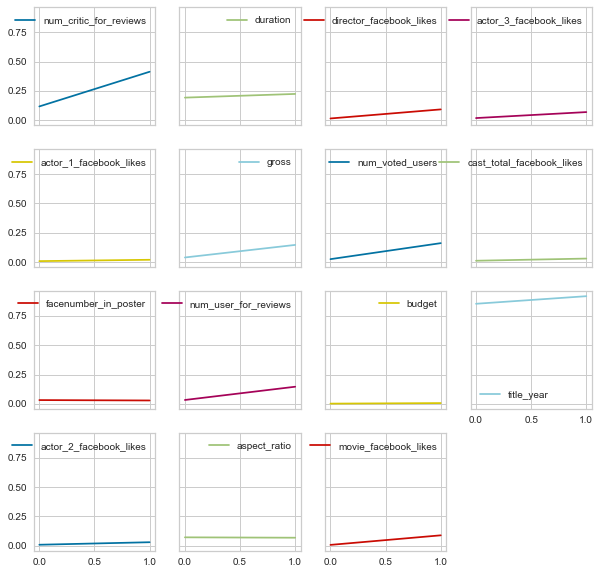

In [253]:
cluster_result.plot(subplots=True, layout=(4,4), sharey=True, figsize=(10,10))

In [254]:
km.score(X_norm)

-365.2729061175987

WCSS: 365.2729061175987
          0
0  0.006936
1  0.088452


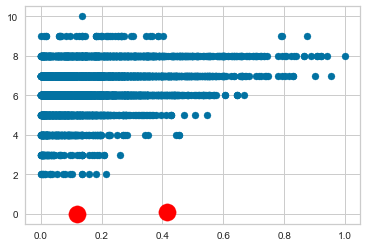

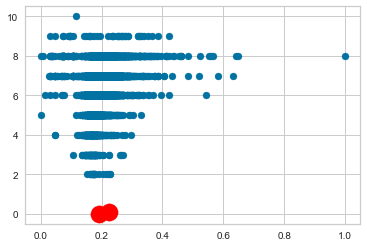

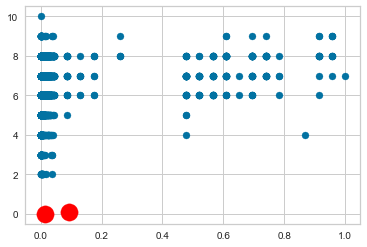

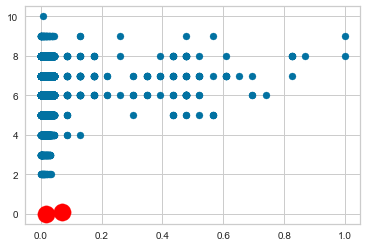

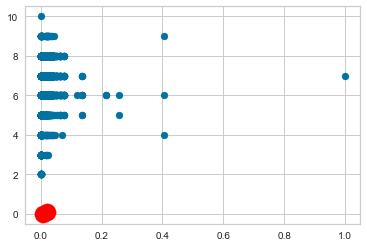

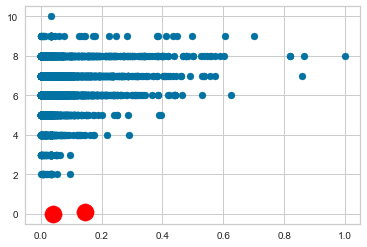

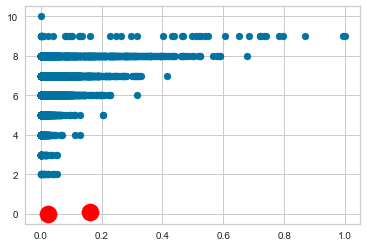

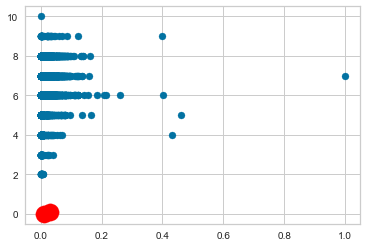

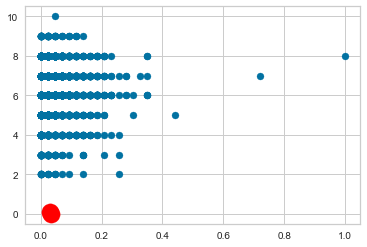

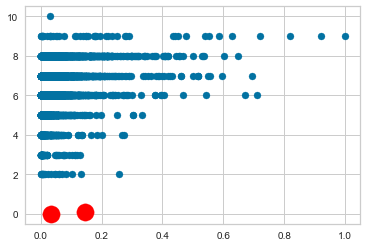

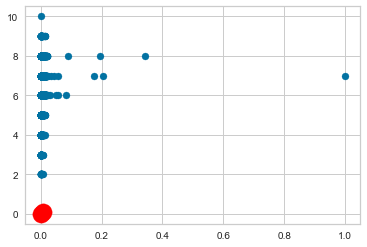

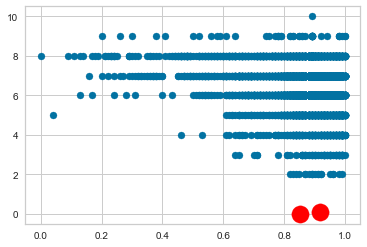

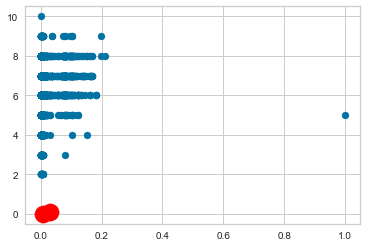

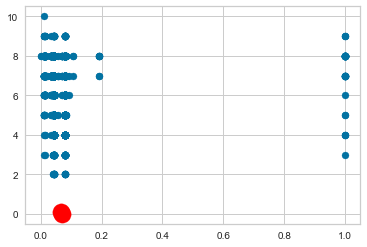

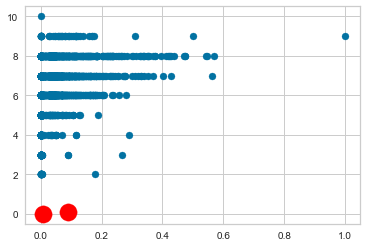

In [255]:
print('WCSS: '+str(km.inertia_))
print(pd.DataFrame(km.cluster_centers_[:,-1]))
j=0
for i in X_norm.columns:
  plt.scatter(X_norm[i], y)
  plt.scatter(km.cluster_centers_[:, j], km.cluster_centers_[:, -1], s=300, c='red')
  plt.show()
  j+=1

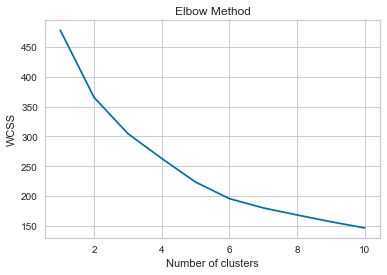

In [256]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Silhouette Score (n=2) : 0.4400668192139925
Silhouette Score (n=3) : 0.3918030075979659
Silhouette Score (n=4) : 0.3427240893884485
Silhouette Score (n=5) : 0.26251439912037755
Silhouette Score (n=6) : 0.2979397711351472
Silhouette Score (n=7) : 0.30184505074919377
Silhouette Score (n=8) : 0.2856558390702992
Silhouette Score (n=9) : 0.2886588996517101
Silhouette Score (n=10) : 0.24490353645098079


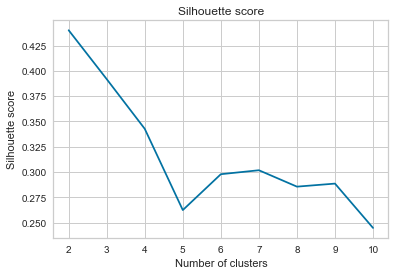

In [257]:
silhouette = []
for i in range(2,11):
  KMean= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  KMean.fit(X_norm)
  label=KMean.predict(X_norm)
  sil = silhouette_score(X_norm, label)
  silhouette.append(sil)
  print('Silhouette Score (n='+str(i)+') : '+str(sil))
plt.plot(range(2, 11), silhouette)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()